In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
data = pd.read_csv("data.csv")


In [3]:
df = data.copy()
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
df.rename(columns={'concave points_worst': 'concave_points_worst',
                   'concave points_mean': 'concave_points_mean',
                   'concave points_se': 'concave_points_se'}, inplace=True)

In [7]:
data.shape

(569, 33)

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [10]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [11]:
df["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [12]:
tanı = df['diagnosis'].value_counts().reset_index()
tanı

diagnosis  count
0          0    357
1          1    212

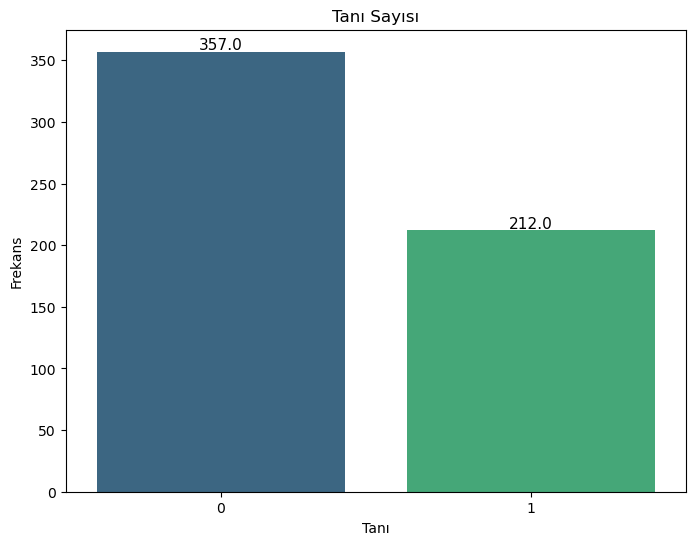

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='diagnosis', y='count', data=tanı, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Tanı')
plt.ylabel('Frekans')
plt.title('Tanı Sayısı')
plt.show()

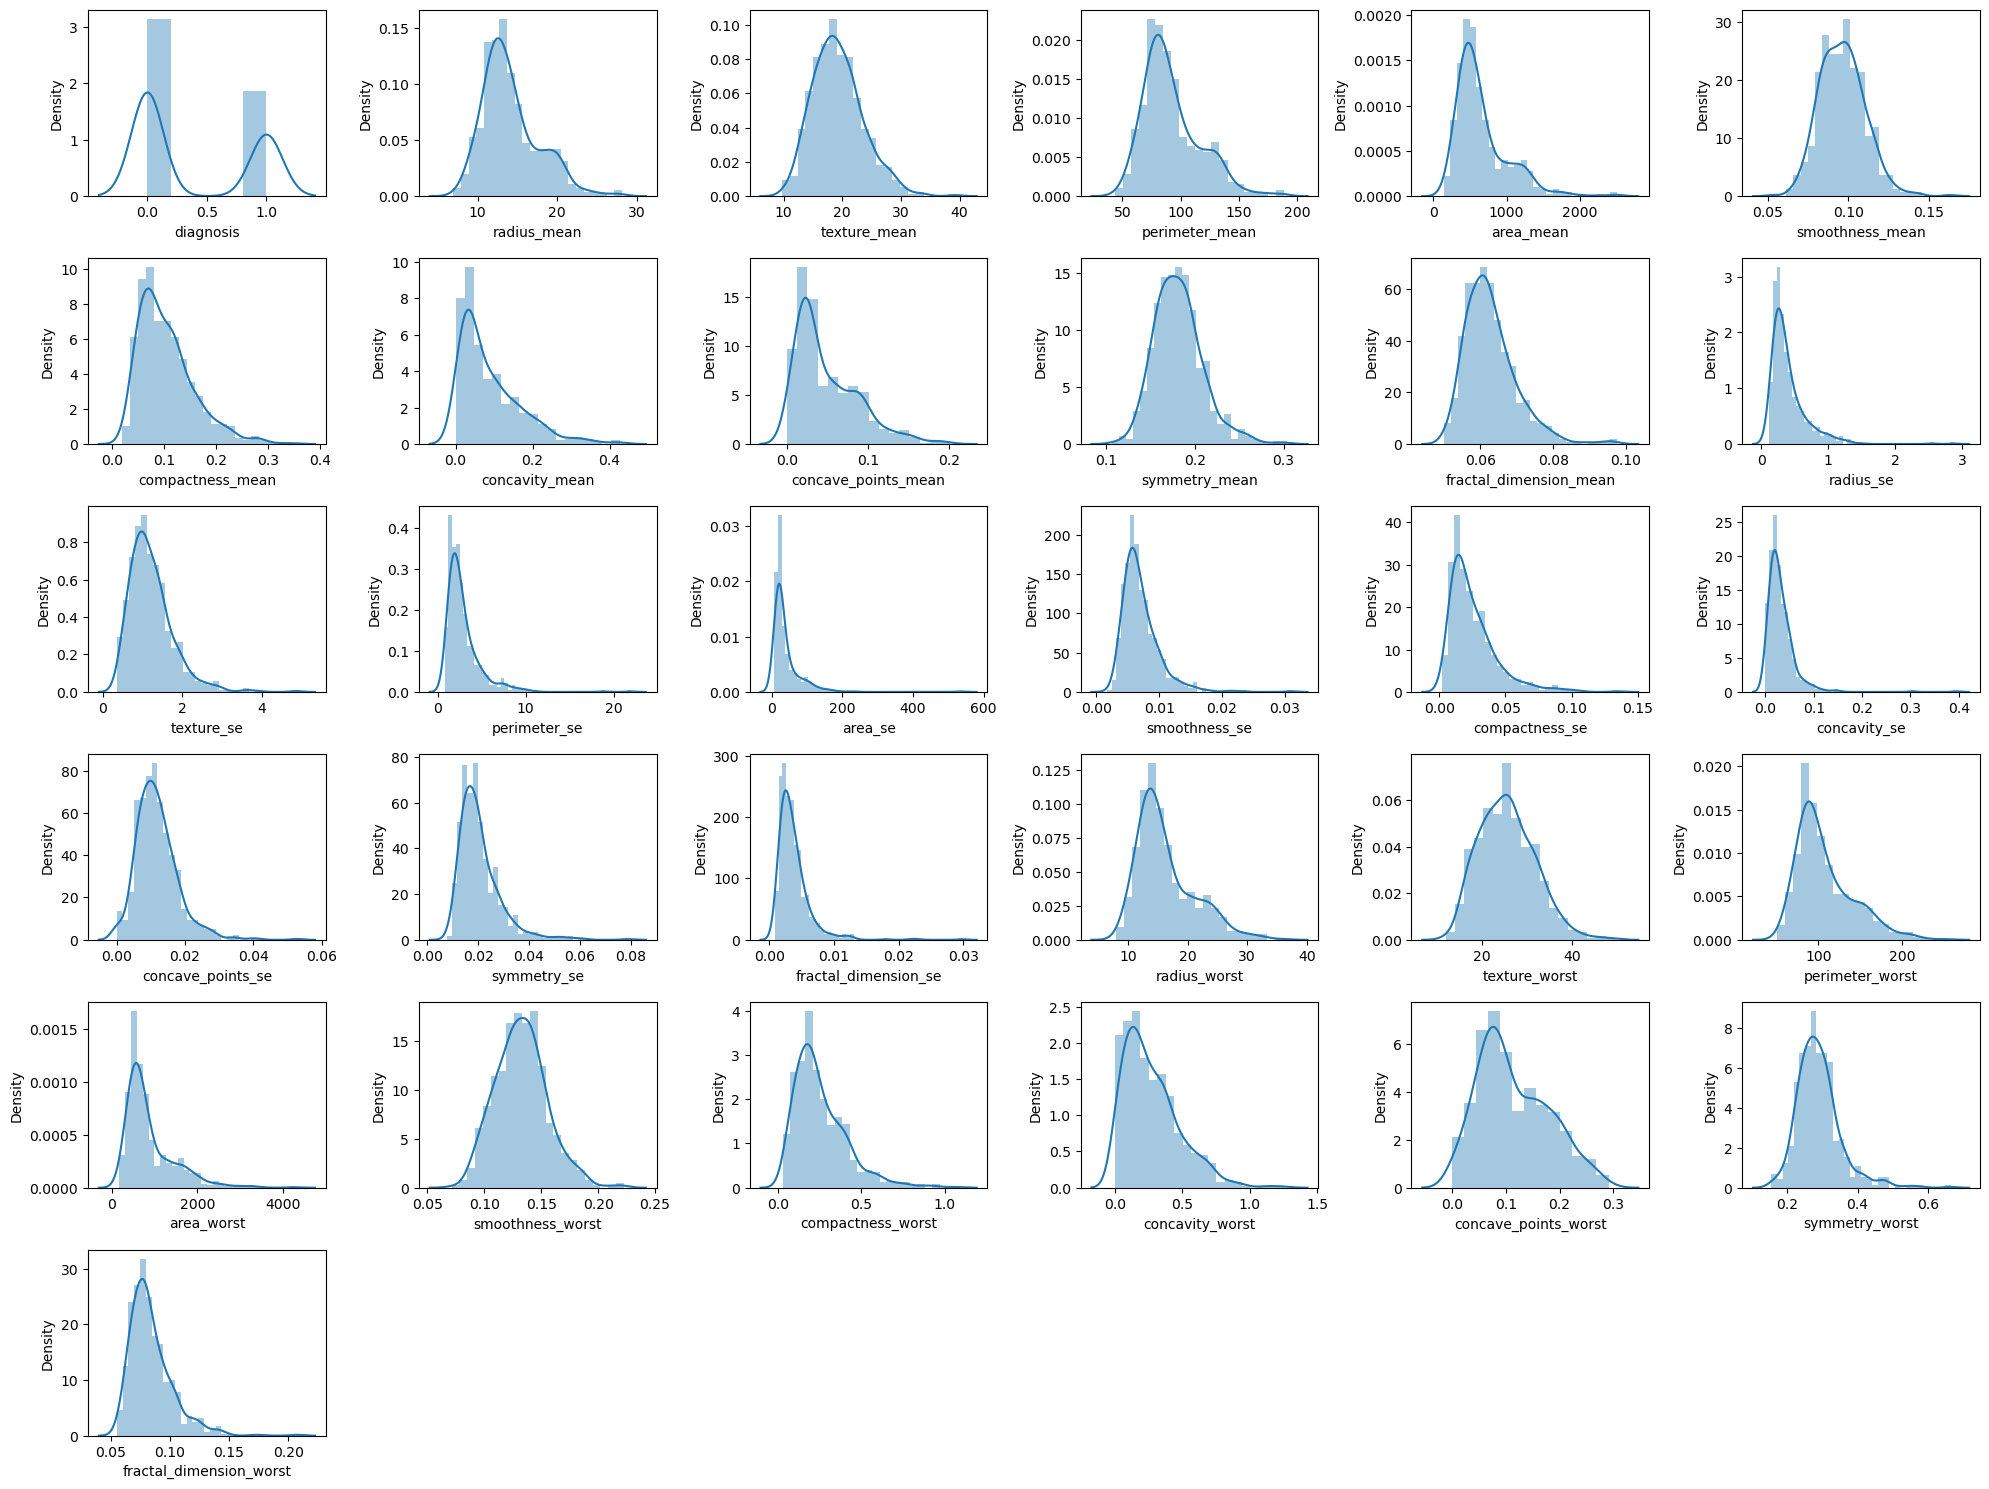

In [14]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=31:
        ax = plt.subplot(6,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

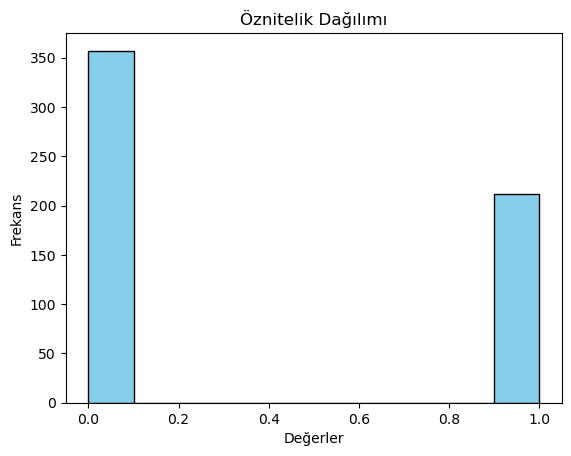

In [15]:
plt.hist(df['diagnosis'], bins=10, color='skyblue', edgecolor='black')

# Histogram başlığı ve eksen etiketleri
plt.title('Öznitelik Dağılımı')
plt.xlabel('Değerler')
plt.ylabel('Frekans')

# Histogramı göster
plt.show()

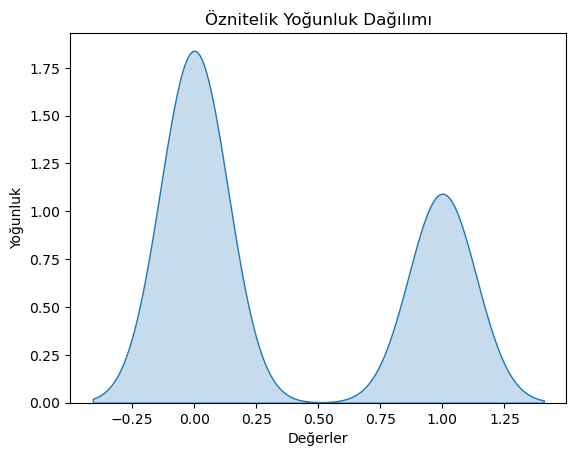

In [16]:
sns.kdeplot(df['diagnosis'], shade=True)

# Yoğunluk grafiği başlığı ve eksen etiketleri
plt.title('Öznitelik Yoğunluk Dağılımı')
plt.xlabel('Değerler')
plt.ylabel('Yoğunluk')

# Yoğunluk grafiğini göster
plt.show()

In [17]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave_points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave_points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave_points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave_points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave_points_se         0.372320         0.

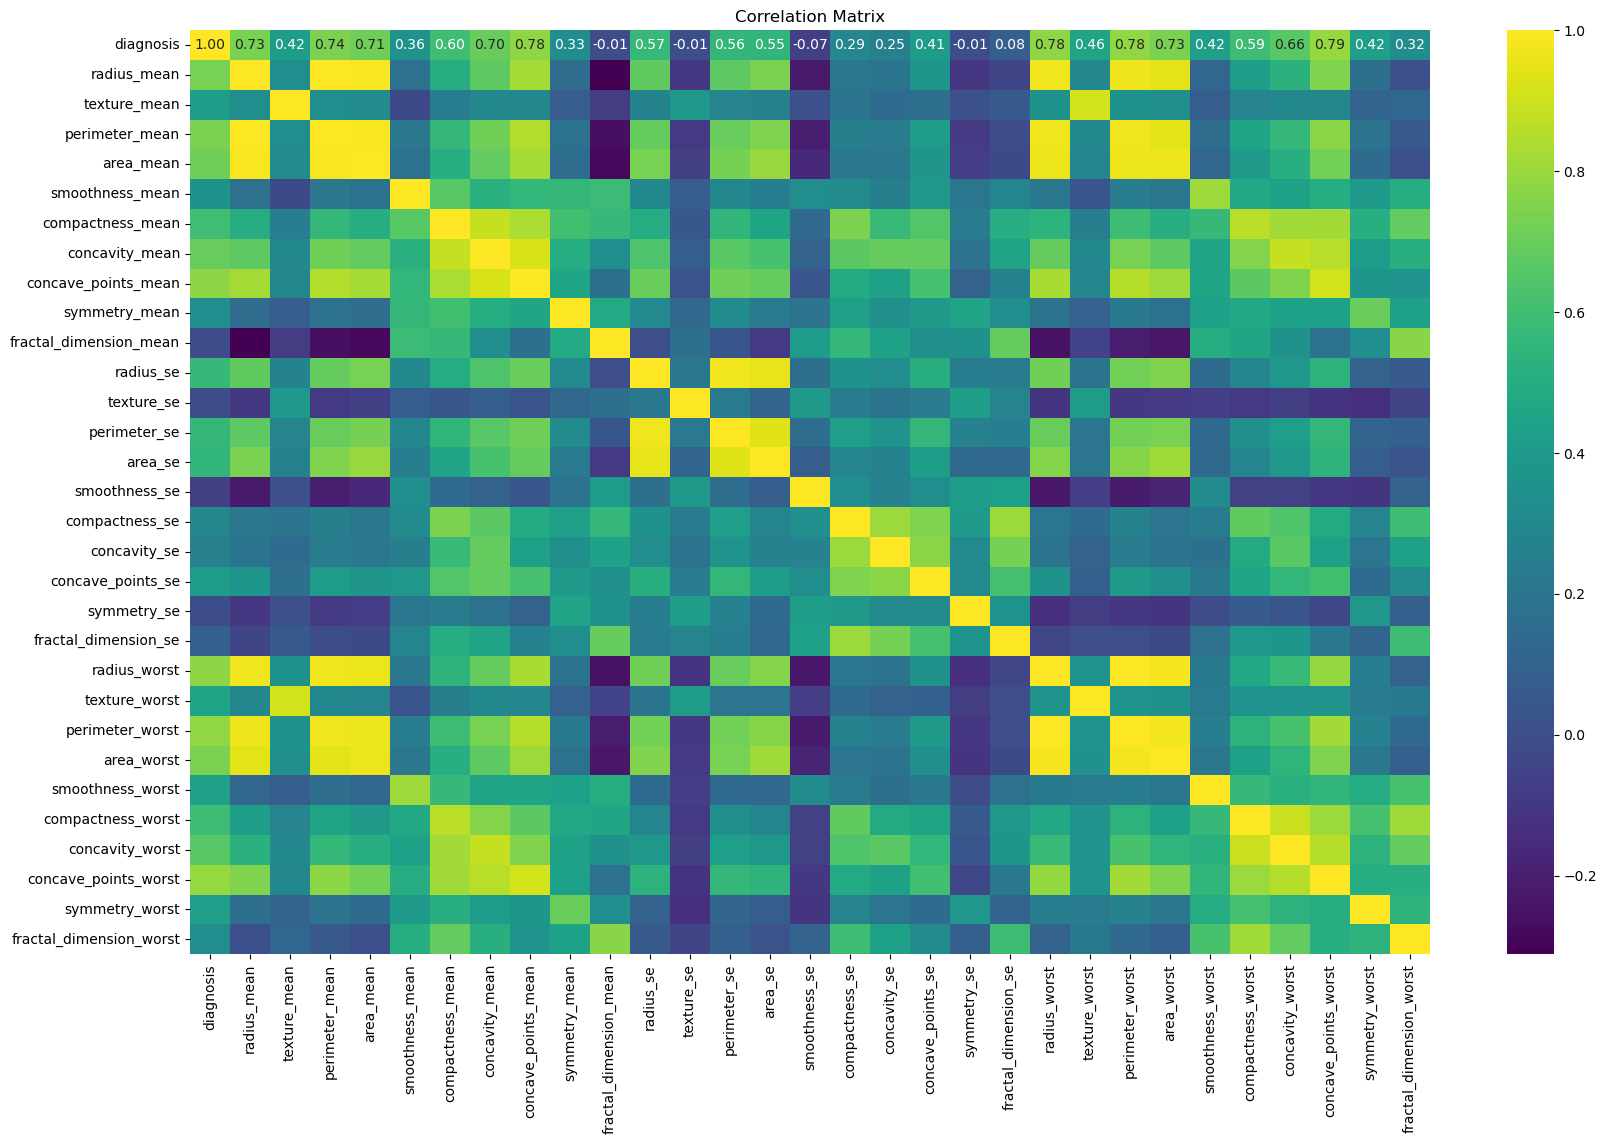

In [19]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

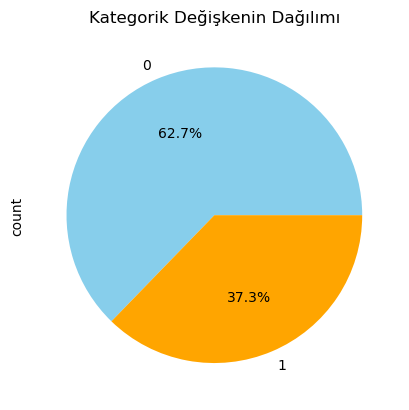

In [20]:
import matplotlib.pyplot as plt

# Kategorik değişkenin sıklığını hesapla
kategori_sayisi = df['diagnosis'].value_counts()

# Pasta grafiği oluştur
kategori_sayisi.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])

# Grafik başlığı
plt.title('Kategorik Değişkenin Dağılımı')

# Pasta grafiğini göster
plt.show()

In [21]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [22]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis = 1)
columns = X.columns.tolist()

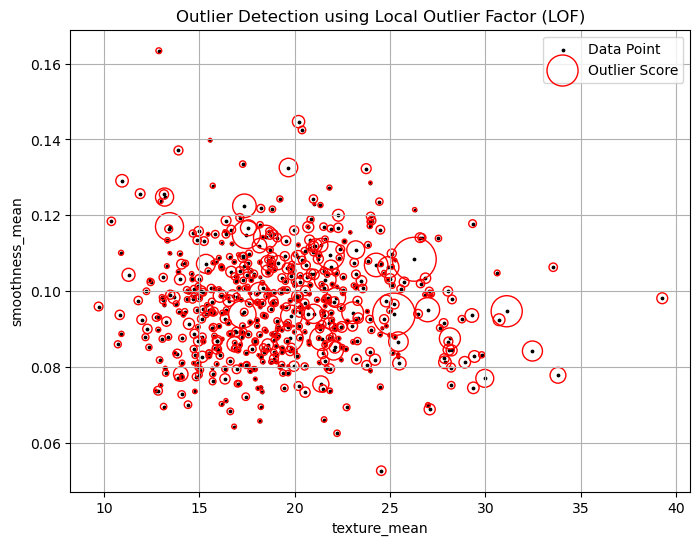

Outlier indices: [ 38 461]


In [23]:
lof = LocalOutlierFactor()
lof.fit(X)

# Get the negative outlier factor scores
X_score = lof.negative_outlier_factor_

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color="k", s=3, label="Data Point")

# Calculate the radius for each point based on the outlier score
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

# Plot the points with sizes corresponding to the outlier score
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier Score")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.grid(True)
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.show()

# Threshold for outlier detection
threshold_outlier = -2.5
filtre = X_score < threshold_outlier
outlier_index = np.where(filtre)[0]
print("Outlier indices:", outlier_index)

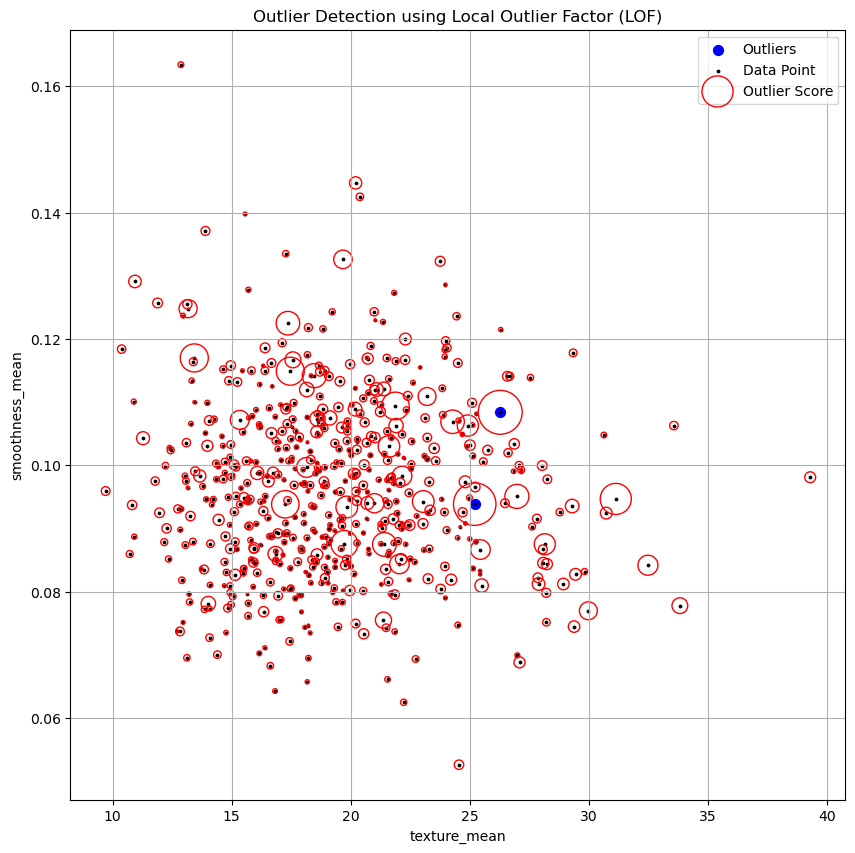

In [24]:
plt.figure(figsize=(10, 10))

# Plot outliers in blue
plt.scatter(X.iloc[outlier_index, 0], X.iloc[outlier_index, 1], color="blue", s=50, label="Outliers")

# Plot all data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color="k", s=3, label="Data Point")

# Plot outlier scores with sizes corresponding to the outlier score
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier Score")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.grid(True)
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.show()

In [25]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

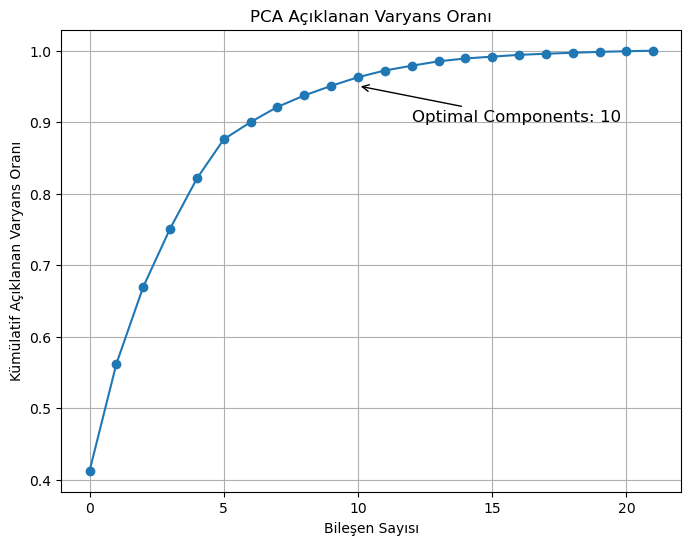

In [26]:
X_standardized = (X - X.mean()) / X.std()

# Apply PCA without specifying the number of components
pca = PCA()
pca.fit(X_standardized)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the optimal number of components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans Oranı')
plt.title('PCA Açıklanan Varyans Oranı')

# Annotate the plot with the optimal number of components
plt.annotate(f'Optimal Components: {optimal_components}', 
             xy=(optimal_components, cumulative_variance_ratio[optimal_components-1]),
             xytext=(optimal_components + 2, cumulative_variance_ratio[optimal_components-1] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.grid(True)
plt.show()

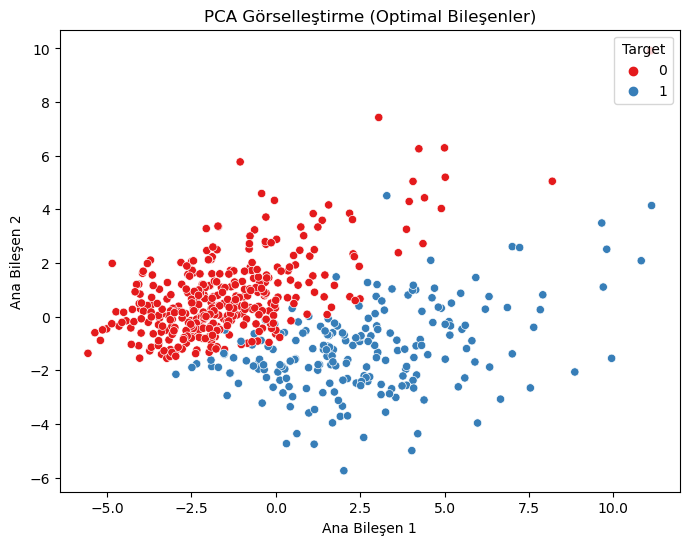

In [29]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame to hold the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Concatenate principal components with the target variable
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis=1)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=final_df, palette='Set1')
plt.title('PCA Görselleştirme (Optimal Bileşenler)')
plt.xlabel('Ana Bileşen 1')
plt.ylabel('Ana Bileşen 2')
plt.legend(title='Target', loc='upper right')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concave_points_mean      569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   texture_se               569 non-null    float64
 8   area_se                  569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave_points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape

(453, 22)

In [34]:
loj_model = LogisticRegression()
loj_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = loj_model.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [38]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [39]:
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix

# Modelinizin tahminlerini kullanarak confusion matrix'i hesaplayın
conf_matrix = confusion_matrix(y_test, y_pred)

# Oluşturulan confusion matrix'i ekrana yazdırın
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 3 46]]


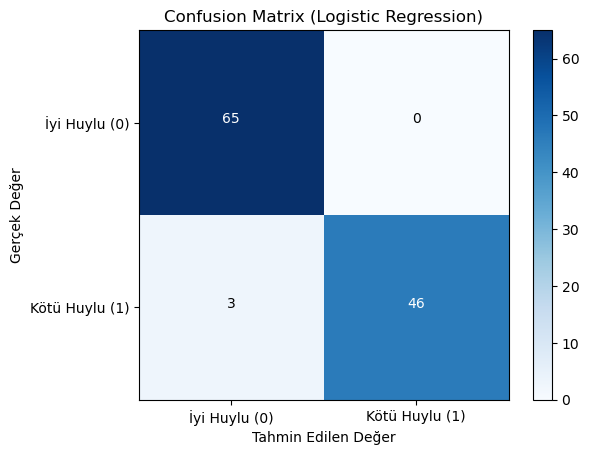

In [41]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
# Sütun ve satır etiketleri
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)

# Değerlerin gösterilmesi
for i in range(len(sınıf)):
    for j in range(len(sınıf)):

        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

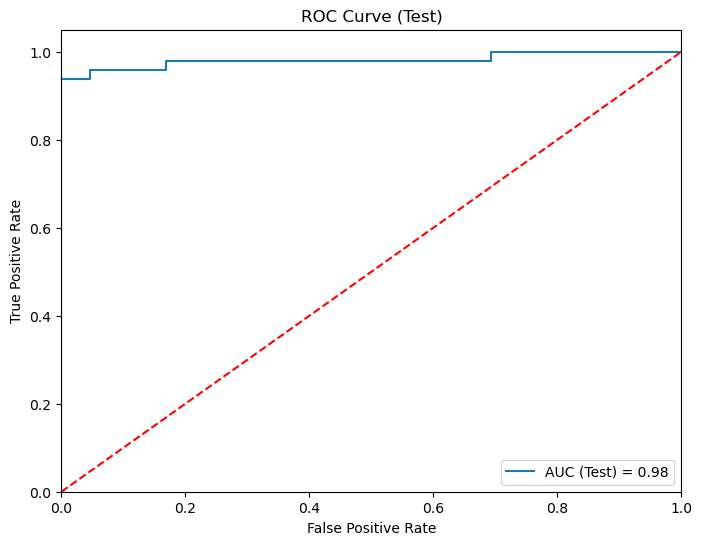

In [42]:
y_pred_test = loj_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC (Test) = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend(loc='lower right')
plt.show()

In [43]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = nb_model.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[63  2]
 [ 6 43]]


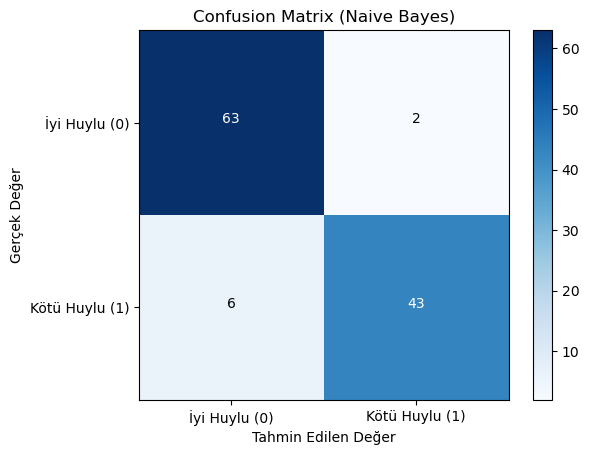

In [42]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
# Sütun ve satır etiketleri
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)

# Değerlerin gösterilmesi
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [43]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  1]
 [ 5 44]]


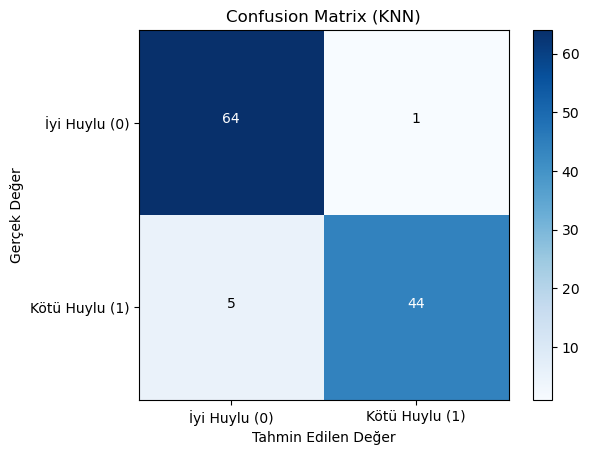

In [48]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (KNN)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
# Sütun ve satır etiketleri
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)

# Değerlerin gösterilmesi
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [49]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1, 10)}

In [50]:
knn_cv = GridSearchCV(knn, knn_params, cv=10)

In [51]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [52]:
print("En iyi parametreler:", knn_cv.best_params_)
print("En iyi skor:", knn_cv.best_score_)

test_score = knn_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'n_neighbors': 5}
En iyi skor: 0.9623188405797102
Test seti skoru: 0.9473684210526315


In [53]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [56]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  1]
 [ 5 44]]


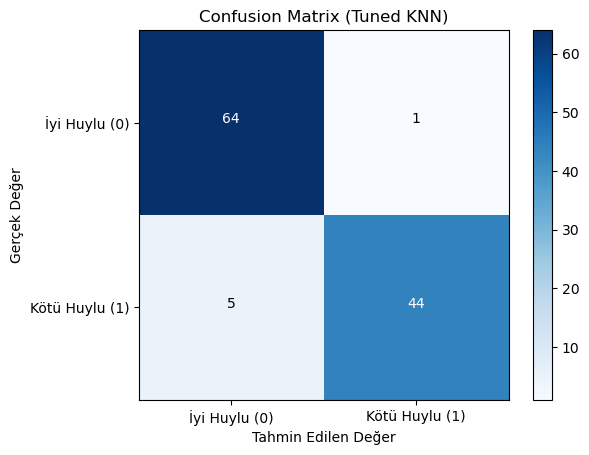

In [57]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned KNN)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [66]:
svc_model = SVC()

In [67]:
svc_model.fit(X_train, y_train)

SVC()

In [68]:
y_pred = svc_model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [70]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 4 45]]


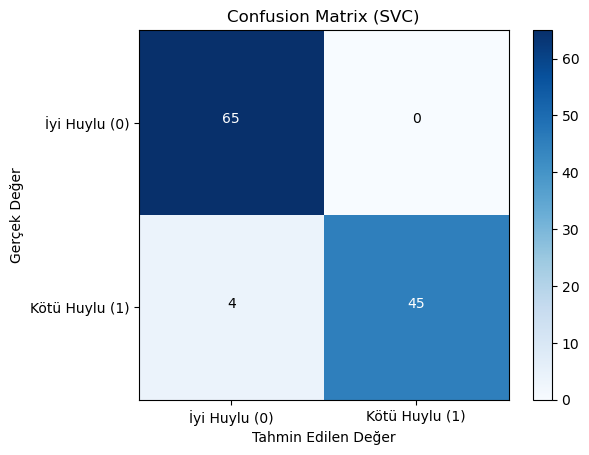

In [71]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [72]:
svc_params = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001]}

In [73]:
svc= SVC()

In [74]:
svc_cv = GridSearchCV(svc, svc_params, cv=5)

In [75]:
svc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [76]:
print("En iyi parametreler:", svc_cv.best_params_)
print("En iyi skor:", svc_cv.best_score_)

En iyi parametreler: {'C': 10, 'gamma': 0.01}
En iyi skor: 0.9823443223443225


In [77]:
test_score = svc_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

Test seti skoru: 0.9649122807017544


In [78]:
svc = SVC(C = 10, gamma = 0.01)

In [79]:
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [80]:
y_pred = svc.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [82]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 4 45]]


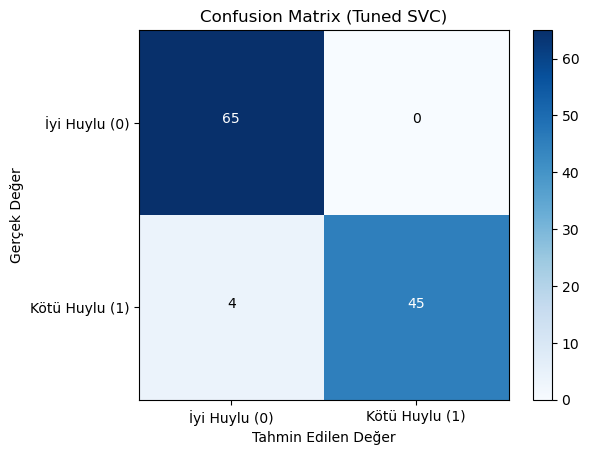

In [83]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned SVC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [84]:
mlpc_model = MLPClassifier()

In [85]:
mlpc_model.fit(X_train, y_train)

MLPClassifier()

In [86]:
y_pred = mlpc_model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [88]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  1]
 [ 3 46]]


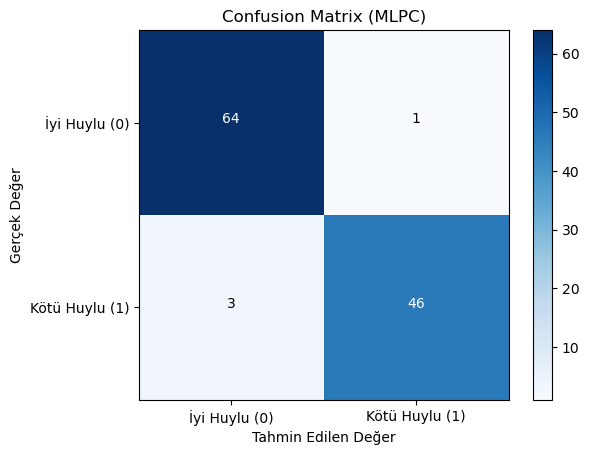

In [89]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (MLPC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [339]:
mlpc_params = {
    'hidden_layer_sizes': [(100,), (50,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

In [340]:
mlpc = MLPClassifier()

In [341]:
mlpc_cv = GridSearchCV(mlpc, mlpc_params, cv=5)

In [342]:
mlpc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100,), (50,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [343]:
print("En iyi parametreler:", mlpc_cv.best_params_)
print("En iyi skor:", mlpc_cv.best_score_)
test_score = mlpc_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
En iyi skor: 0.9801221001221002
Test seti skoru: 0.9649122807017544


In [344]:
mlpc = MLPClassifier(activation = "tanh", alpha = 0.05, hidden_layer_sizes = (50, 50), learning_rate = "constant", solver = "adam")

In [345]:
mlpc.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 50))

In [346]:
y_pred = mlpc.predict(X_test)

In [347]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [348]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  1]
 [ 3 46]]


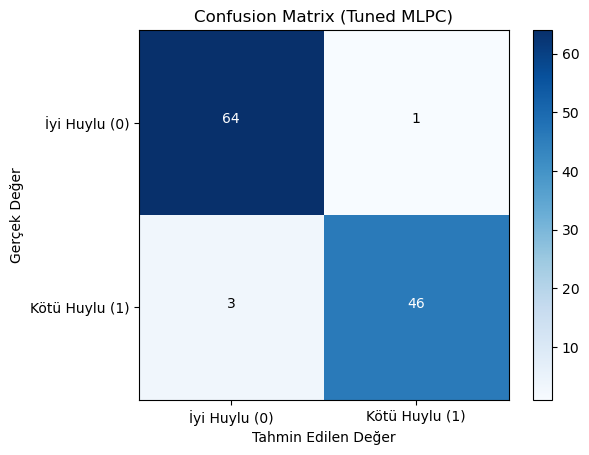

In [349]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned MLPC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [102]:
cart_model = DecisionTreeClassifier()

In [103]:
cart_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
y_pred = cart_model.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9298245614035088


In [106]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[63  2]
 [ 6 43]]


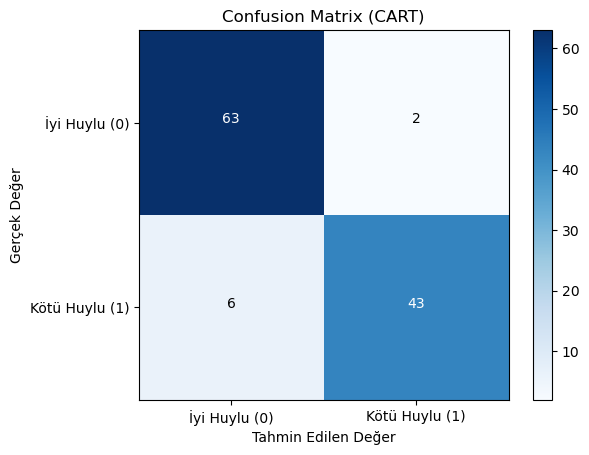

In [107]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CART)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [108]:
cart_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [109]:
cart = DecisionTreeClassifier()

In [110]:
cart_cv = GridSearchCV(cart, cart_params, cv=5)

In [111]:
cart_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [113]:
print("En iyi parametreler:", cart_cv.best_params_)
print("En iyi skor:", cart_cv.best_score_)
test_score = cart_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
En iyi skor: 0.9448351648351648
Test seti skoru: 0.9122807017543859


In [114]:
cart = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 10)

In [115]:
cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [116]:
y_pred = cart.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9122807017543859


In [118]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[63  2]
 [ 8 41]]


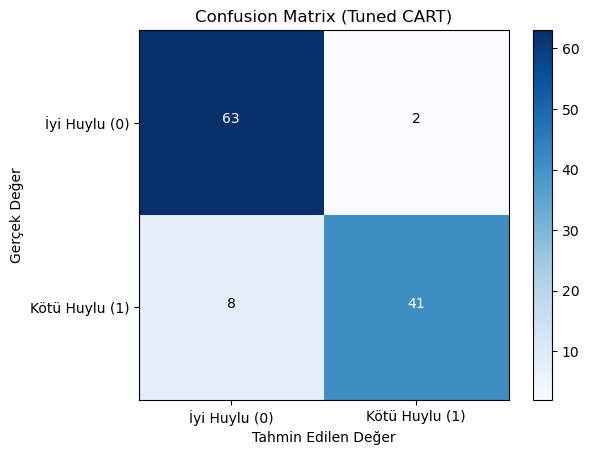

In [119]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned CART)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [120]:
rf_model = RandomForestClassifier()

In [121]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [122]:
y_pred = rf_model.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [124]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  1]
 [ 4 45]]


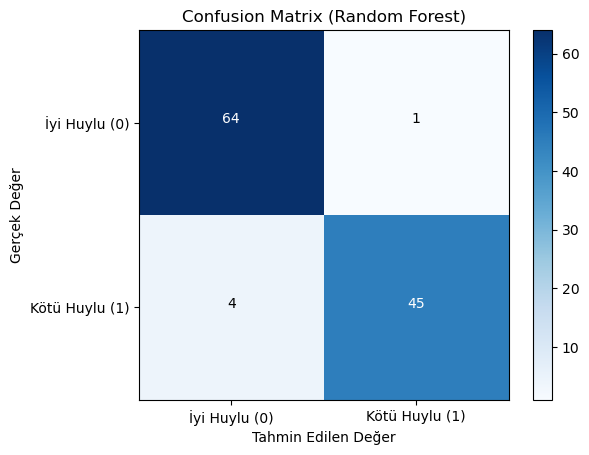

In [125]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [147]:
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [148]:
rf = RandomForestClassifier()

In [149]:
rf_cv = GridSearchCV(rf, rf_params, cv=5)

In [150]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [153]:
print("En iyi parametreler:", rf_cv.best_params_)
print("En iyi skor:", rf_cv.best_score_)
test_score = rf_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
En iyi skor: 0.9690842490842492
Test seti skoru: 0.9385964912280702


In [154]:
rf = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

In [155]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_pred = rf.predict(X_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [159]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 4 45]]


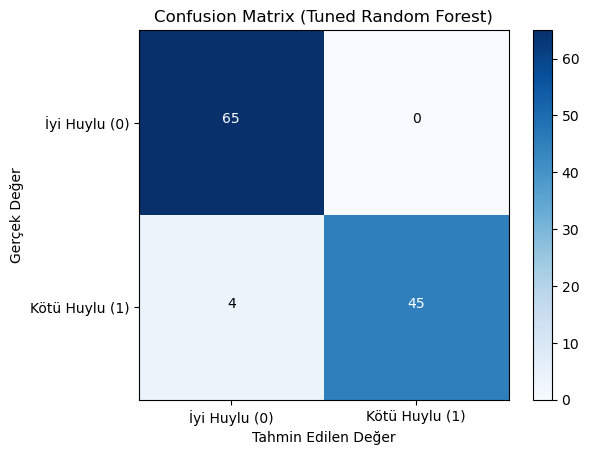

In [160]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [161]:
gbc_model = GradientBoostingClassifier()

In [162]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [163]:
y_pred = gbc_model.predict(X_test)

In [164]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


In [165]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[63  2]
 [ 5 44]]


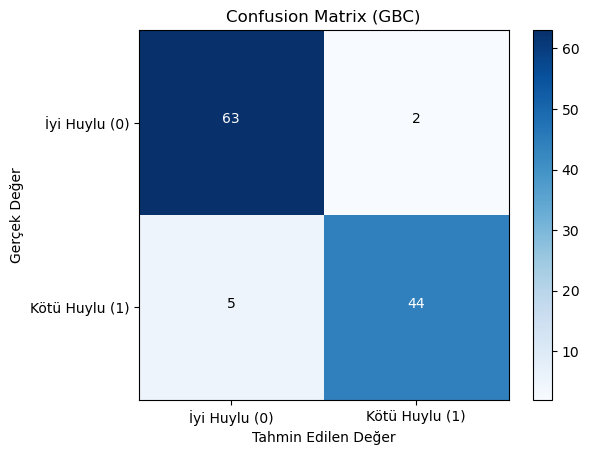

In [166]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (GBC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [235]:
gbc_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

In [236]:
gbc = GradientBoostingClassifier()

In [237]:
gbc_cv = GridSearchCV(gbc, gbc_params, cv=5)

In [238]:
gbc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [239]:
print("En iyi parametreler:", gbc_cv.best_params_)
print("En iyi skor:", gbc_cv.best_score_)
test_score = gbc_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
En iyi skor: 0.9580708180708181
Test seti skoru: 0.9649122807017544


In [240]:
gbc = GradientBoostingClassifier(learning_rate =  0.2, max_depth = 3, n_estimators = 100)

In [241]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2)

In [242]:
y_pred = gbc.predict(X_test)

In [243]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [244]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 4 45]]


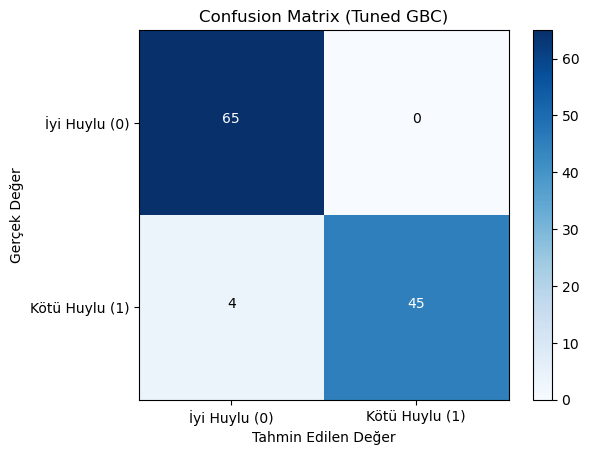

In [245]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned GBC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [246]:
xgbc_model = XGBClassifier()

In [247]:
xgbc_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [248]:
y_pred = xgbc_model.predict(X_test)

In [249]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


In [250]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[62  3]
 [ 4 45]]


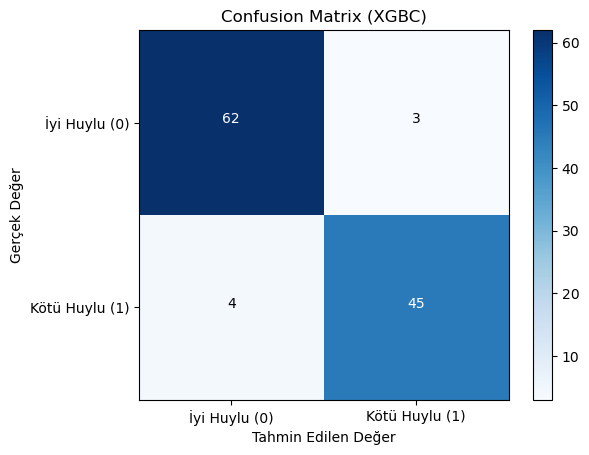

In [251]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (XGBC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [257]:
xgbc_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

In [258]:
xgbc = XGBClassifier()

In [259]:
xgbc_cv = GridSearchCV(xgbc, xgbc_params, cv=5)

In [260]:
xgbc_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [261]:
print("En iyi parametreler:", xgbc_cv.best_params_)
print("En iyi skor:", xgbc_cv.best_score_)
test_score = xgbc_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
En iyi skor: 0.9669108669108668
Test seti skoru: 0.9385964912280702


In [262]:
xgbc = XGBClassifier(learning_rate =  0.05, max_depth = 3, n_estimators = 200)

In [263]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [264]:
y_pred = xgbc.predict(X_test)

In [265]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


In [266]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[62  3]
 [ 4 45]]


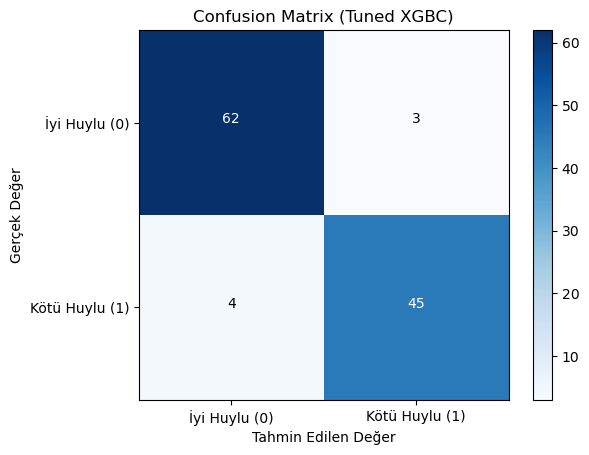

In [267]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned XGBC)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [268]:
lgbm_model = LGBMClassifier()

In [269]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 161, number of negative: 292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 453, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355408 -> initscore=-0.595349
[LightGBM] [Info] Start training from score -0.595349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier()

In [270]:
y_pred = lgbm_model.predict(X_test)

In [271]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [272]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[64  1]
 [ 3 46]]


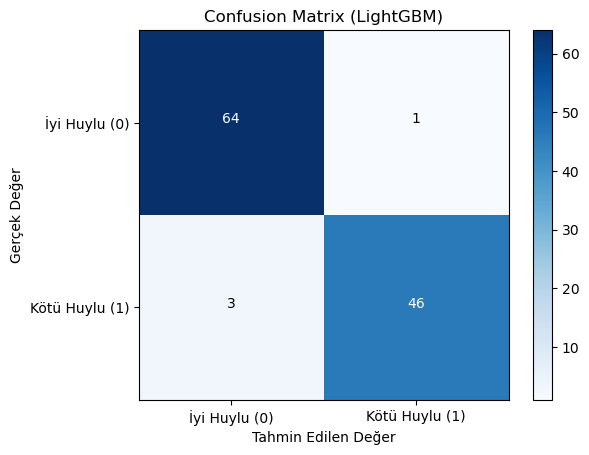

In [273]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (LightGBM)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [292]:
lgbm_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

In [293]:
lgbm = LGBMClassifier()

In [294]:
lgbm_cv = GridSearchCV(lgbm, lgbm_params, cv=5)

In [295]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 128, number of negative: 234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2652
[LightGBM] [Info] Number of data points in the train set: 362, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353591 -> initscore=-0.603291
[LightGBM] [Info] Start training from score -0.603291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [296]:
print("En iyi parametreler:", lgbm_cv.best_params_)
print("En iyi skor:", lgbm_cv.best_score_)
test_score = lgbm_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
En iyi skor: 0.9712576312576313
Test seti skoru: 0.9649122807017544


In [297]:
lgbm = LGBMClassifier(learning_rate =  0.2, max_depth = 3, n_estimators = 100)

In [298]:
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 161, number of negative: 292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 453, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355408 -> initscore=-0.595349
[LightGBM] [Info] Start training from score -0.595349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(learning_rate=0.2, max_depth=3)

In [299]:
y_pred = lgbm.predict(X_test)

In [300]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [301]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 4 45]]


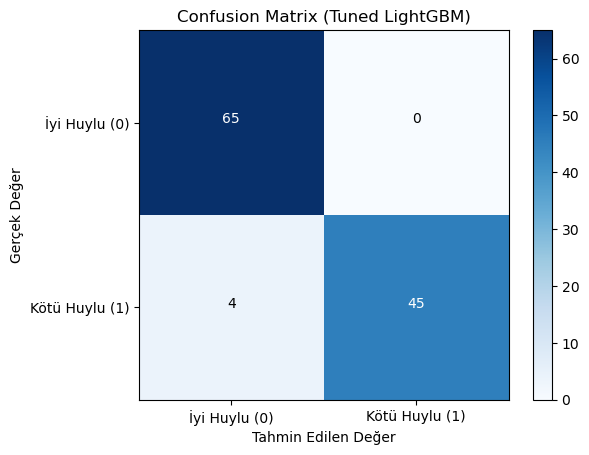

In [302]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned LightGBM)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [303]:
catb_model = CatBoostClassifier()

In [304]:
catb_model.fit(X_train,y_train)

Learning rate set to 0.007347
0:	learn: 0.6817941	total: 4.77ms	remaining: 4.76s
1:	learn: 0.6705156	total: 9.25ms	remaining: 4.61s
2:	learn: 0.6597936	total: 13.6ms	remaining: 4.51s
3:	learn: 0.6487385	total: 19.7ms	remaining: 4.9s
4:	learn: 0.6380574	total: 24.6ms	remaining: 4.89s
5:	learn: 0.6262993	total: 28.6ms	remaining: 4.74s
6:	learn: 0.6154538	total: 34.1ms	remaining: 4.84s
7:	learn: 0.6024302	total: 39.1ms	remaining: 4.85s
8:	learn: 0.5920209	total: 44.2ms	remaining: 4.87s
9:	learn: 0.5815366	total: 50ms	remaining: 4.95s
10:	learn: 0.5719206	total: 54.5ms	remaining: 4.9s
11:	learn: 0.5607570	total: 58.8ms	remaining: 4.84s
12:	learn: 0.5507649	total: 65.6ms	remaining: 4.98s
13:	learn: 0.5434797	total: 70.9ms	remaining: 4.99s
14:	learn: 0.5328055	total: 74.8ms	remaining: 4.91s
15:	learn: 0.5242292	total: 79ms	remaining: 4.86s
16:	learn: 0.5150812	total: 83.9ms	remaining: 4.85s
17:	learn: 0.5059959	total: 88.1ms	remaining: 4.8s
18:	learn: 0.4983515	total: 92.4ms	remaining: 4.77s

In [305]:
y_pred = catb_model.predict(X_test)

In [306]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [307]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 5 44]]


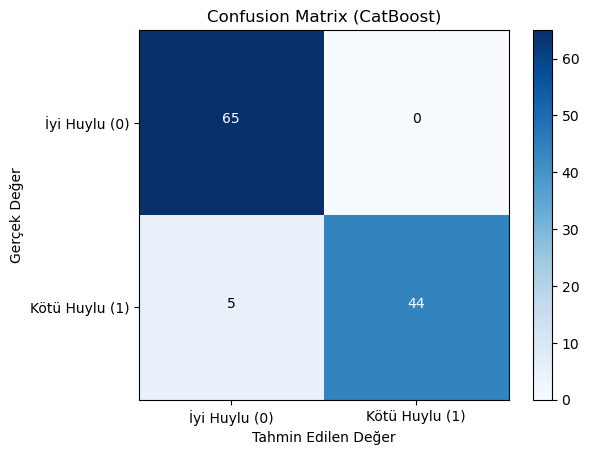

In [308]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CatBoost)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [317]:
catb_params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7]
}

In [318]:
catb = CatBoostClassifier()

In [319]:
catb_cv = GridSearchCV(catb, catb_params, cv=5)

In [320]:
catb_cv.fit(X_train, y_train)

0:	learn: 0.6288610	total: 2.39ms	remaining: 117ms
1:	learn: 0.5780351	total: 4.49ms	remaining: 108ms
2:	learn: 0.5162358	total: 6.42ms	remaining: 101ms
3:	learn: 0.4624350	total: 8.32ms	remaining: 95.7ms
4:	learn: 0.4001511	total: 10.4ms	remaining: 93.4ms
5:	learn: 0.3610821	total: 12.8ms	remaining: 94ms
6:	learn: 0.3397591	total: 15ms	remaining: 92.1ms
7:	learn: 0.3150990	total: 16.9ms	remaining: 88.6ms
8:	learn: 0.2968207	total: 18.7ms	remaining: 85.2ms
9:	learn: 0.2778492	total: 20.4ms	remaining: 81.8ms
10:	learn: 0.2578326	total: 22.4ms	remaining: 79.4ms
11:	learn: 0.2437777	total: 24.3ms	remaining: 77ms
12:	learn: 0.2344194	total: 26.7ms	remaining: 76ms
13:	learn: 0.2176473	total: 29.7ms	remaining: 76.5ms
14:	learn: 0.2060173	total: 31.9ms	remaining: 74.4ms
15:	learn: 0.1913958	total: 33.6ms	remaining: 71.4ms
16:	learn: 0.1801986	total: 35.2ms	remaining: 68.3ms
17:	learn: 0.1672471	total: 36.8ms	remaining: 65.5ms
18:	learn: 0.1582195	total: 38.6ms	remaining: 63ms
19:	learn: 0.146

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000198D148FF10>,
             param_grid={'depth': [3, 5, 7], 'iterations': [50, 100, 200],
                         'learning_rate': [0.05, 0.1, 0.2]})

In [321]:
print("En iyi parametreler:", catb_cv.best_params_)
print("En iyi skor:", catb_cv.best_score_)
test_score = catb_cv.score(X_test, y_test)
print("Test seti skoru:", test_score)

En iyi parametreler: {'depth': 3, 'iterations': 100, 'learning_rate': 0.05}
En iyi skor: 0.977899877899878
Test seti skoru: 0.9649122807017544


In [322]:
catb = CatBoostClassifier(depth = 3, iterations = 100, learning_rate = 0.05)

In [323]:
catb.fit(X_train, y_train)

0:	learn: 0.6153707	total: 1.8ms	remaining: 178ms
1:	learn: 0.5631376	total: 3.73ms	remaining: 183ms
2:	learn: 0.4804915	total: 5.36ms	remaining: 173ms
3:	learn: 0.4280719	total: 6.94ms	remaining: 167ms
4:	learn: 0.3819179	total: 8.59ms	remaining: 163ms
5:	learn: 0.3461154	total: 10.3ms	remaining: 161ms
6:	learn: 0.3217375	total: 11.9ms	remaining: 158ms
7:	learn: 0.2865934	total: 13.6ms	remaining: 156ms
8:	learn: 0.2724234	total: 15.2ms	remaining: 154ms
9:	learn: 0.2540574	total: 16.8ms	remaining: 151ms
10:	learn: 0.2394964	total: 18.3ms	remaining: 148ms
11:	learn: 0.2271018	total: 19.8ms	remaining: 145ms
12:	learn: 0.2195258	total: 21.4ms	remaining: 143ms
13:	learn: 0.2040352	total: 23ms	remaining: 141ms
14:	learn: 0.1969515	total: 24.6ms	remaining: 139ms
15:	learn: 0.1823025	total: 26.2ms	remaining: 137ms
16:	learn: 0.1742955	total: 27.8ms	remaining: 136ms
17:	learn: 0.1612942	total: 29.4ms	remaining: 134ms
18:	learn: 0.1518405	total: 31.3ms	remaining: 134ms
19:	learn: 0.1420765	tota

In [324]:
y_pred = catb.predict(X_test)

In [325]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [326]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[65  0]
 [ 4 45]]


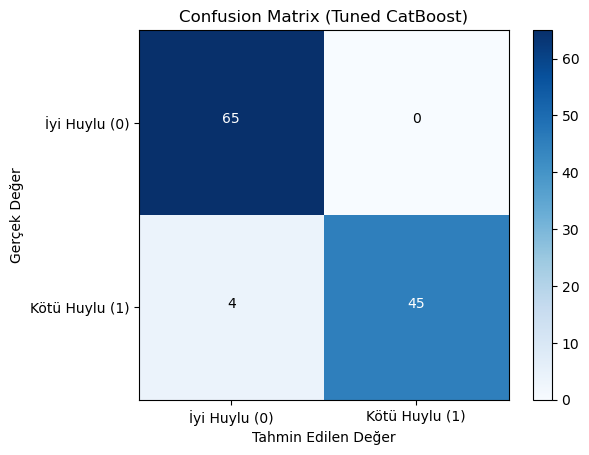

In [327]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned CatBoost)')
plt.colorbar()
sınıf = ['İyi Huylu (0)', 'Kötü Huylu (1)']
plt.xticks(np.arange(len(sınıf)), sınıf)
plt.yticks(np.arange(len(sınıf)), sınıf)
for i in range(len(sınıf)):
    for j in range(len(sınıf)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

In [331]:
modeller = [
    loj_model,
    nb_model,
    knn,
    svc,
    mlpc,
    cart,
    rf,
    gbc,
    xgbc,
    lgbm,
    catb,
]
f1_scores = {}

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1_score = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    f1_scores[isimler] = f1_score
for isimler, f1_score in f1_scores.items():
    print(f"{isimler}: F1 Score: {f1_score:.4f}")



LogisticRegression: F1 Score: 0.9736
GaussianNB: F1 Score: 0.9294
KNeighborsClassifier: F1 Score: 0.9470
SVC: F1 Score: 0.9647
MLPClassifier: F1 Score: 0.9648
DecisionTreeClassifier: F1 Score: 0.9114
RandomForestClassifier: F1 Score: 0.9647
GradientBoostingClassifier: F1 Score: 0.9647
XGBClassifier: F1 Score: 0.9385
LGBMClassifier: F1 Score: 0.9647
CatBoostClassifier: F1 Score: 0.9647


In [332]:
sonuclar_list = []

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk * 100]], columns=["Modeller", "Accuracy"])
    sonuclar_list.append(sonuc)
sonuclar = pd.concat(sonuclar_list, ignore_index=True)

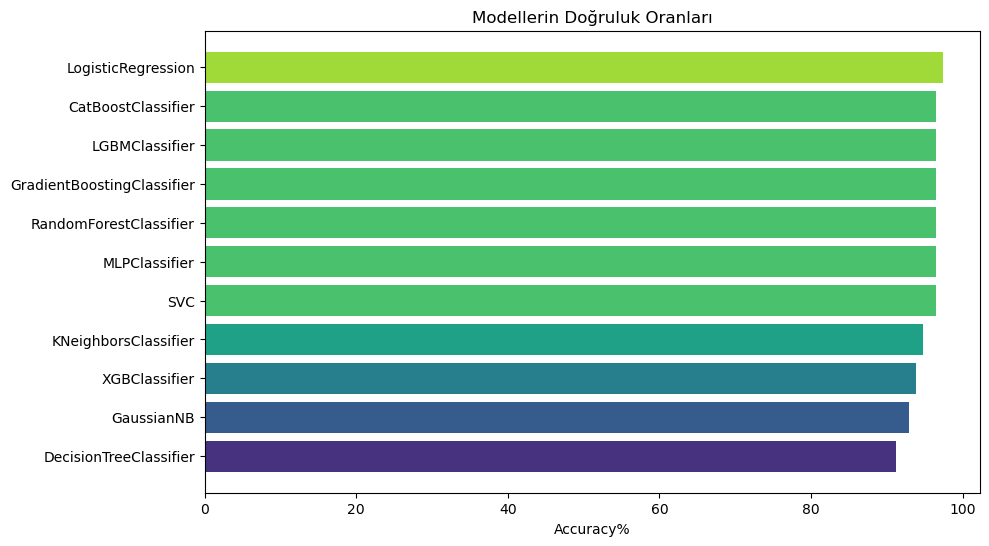

In [333]:
sonuclar = sonuclar.sort_values(by='Accuracy', ascending=True)
unique_accuracy_values = sonuclar['Accuracy'].unique()
colors = sns.color_palette('viridis', len(unique_accuracy_values))
color_dict = {acc: color for acc, color in zip(unique_accuracy_values, colors)}
plt.figure(figsize=(10, 6))
for i, row in sonuclar.iterrows():
    plt.barh(row['Modeller'], row['Accuracy'], color=color_dict[row['Accuracy']])
plt.xlabel('Accuracy%')
plt.title('Modellerin Doğruluk Oranları')
plt.show()

In [334]:
# X = df[['concavity_mean']]  
# y = df['target']  
# model = gbm_tuned 
# model.fit(X, y)  
# value = 0.546
# predicted_value = model.predict([[value]])  
# print(predicted_value)

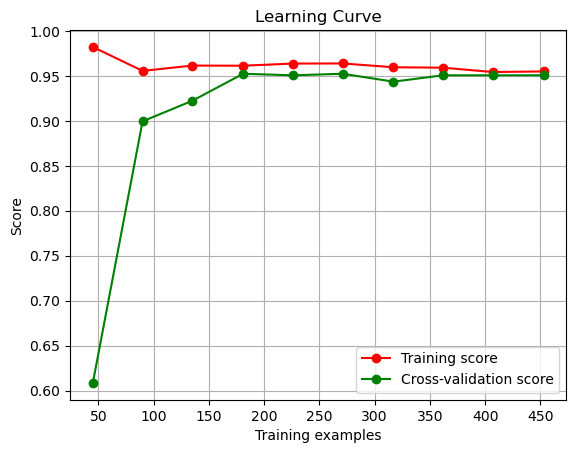

In [335]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(loj_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Learning curve'ü çizme
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")

plt.show()

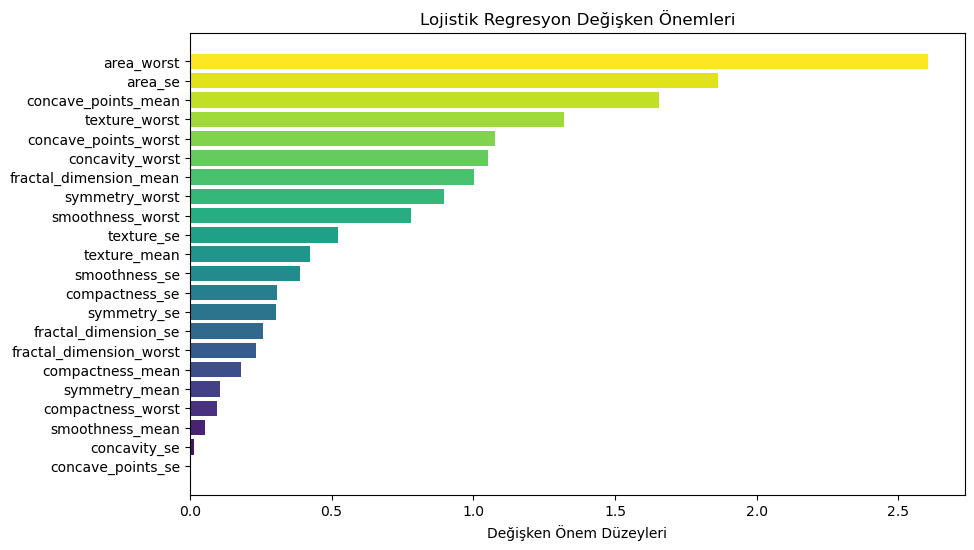

In [336]:
importance = pd.DataFrame({"Importance": np.abs(loj_model.coef_[0])}, index=X.columns)

# Değişken önem düzeylerini sıralama
importance_sorted = importance.sort_values(by="Importance", ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_sorted)))

# Değişken önem düzeylerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(importance_sorted.index, importance_sorted["Importance"], color=colors)
plt.xlabel("Değişken Önem Düzeyleri")
plt.title("Lojistik Regresyon Değişken Önemleri")
plt.show()